In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from subprocess import check_output

In [4]:
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
print(check_output(["ls", "mental_health_data.csv"]).decode("utf8")) 
arp_data = pd.read_csv('mental_health_data.csv') 
print(arp_data)

mental_health_data.csv

      Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                                NaN

In [6]:
#Distribution of the data
print(arp_data.describe())
print(arp_data.shape)

# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

arp_data.head()


#Check for missing data
total = arp_data.isnull().sum().sort_values(ascending=False)
percent = (arp_data.isnull().sum()/arp_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

print(arp_data.info())

'''
#correlation matrix
corrmat =arp_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
'''
'''
#MH6 correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'MH6')['MH6'].index
cm = np.corrcoef(arp_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
'''

       Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                               

"\n#MH6 correlation matrix\nk = 10 #number of variables for heatmap\ncols = corrmat.nlargest(k, 'MH6')['MH6'].index\ncm = np.corrcoef(arp_data[cols].values.T)\nsns.set(font_scale=1.25)\nhm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\nplt.show()\n"

In [7]:
#managing dataset
arp_data1 = arp_data[arp_data.columns[arp_data.columns.isin(
        ['Are you self-employed?',
        'How many employees does your company or organization have?',
        'Is your employer primarily a tech company/organization?',
        'Is your primary role within your company related to tech/IT?',
        'Does your employer provide mental health benefits as part of healthcare coverage?',
        'Do you know the options for mental health care available under your employer-provided coverage?',
        'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
        'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
        'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
        'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
        'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
        'Do you think that discussing a physical health issue with your employer would have negative consequences?',
        'Would you feel comfortable discussing a mental health disorder with your coworkers?',
        'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
        'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
        'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
        'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
        'Would you have been willing to discuss a mental health issue with your previous co-workers?',
        'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
        'Have you ever sought treatment for a mental health issue from a mental health professional?',
        'Do you work remotely?',
        'What country do you work in?',
        'What US state or territory do you live in?',
        'What country do you live in?',
        'What is your gender?',
        'What is your age?',
        'Have you been diagnosed with a mental health condition by a medical professional?',
        'Do you currently have a mental health disorder?',
        'Have you had a mental health disorder in the past?',
        'Do you have a family history of mental illness?',
        'Do you know local or online resources to seek help for a mental health disorder?']
)]]

arp_data1.isna().sum() #getting the number of null values for each column
#arp_data1.head(10)

Are you self-employed?                                                                                                                               0
How many employees does your company or organization have?                                                                                         287
Is your employer primarily a tech company/organization?                                                                                            287
Is your primary role within your company related to tech/IT?                                                                                      1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                  287
Do you know the options for mental health care available under your employer-provided coverage?                                                    420
Has your employer ever formally discussed mental health (for example, as part of a wellness ca

In [8]:
for col in arp_data1.columns:
    print(col)

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

In [9]:
#Renaming columns
arp_data1.rename(columns = {'Are you self-employed?': 'entrepreneur',
                    'How many employees does your company or organization have?': 'org_size',
                    'Is your employer primarily a tech company/organization?' : 'tech_company',
                    'Is your primary role within your company related to tech/IT?' : 'IT_profile',
                    'Is your primary role within your company related to tech/IT?' : 'emp_mental_health_benefit',
                    'Does your employer provide mental health benefits as part of healthcare coverage?' : 'mental_health_care',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'mental_health_campaign',
                    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?' : 'mental_health_resources',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' : 'data_privacy',
                    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'mental_health_leave',
                    'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'mental_health_discussion',
                    'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'physical_health_discussion',
                    'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'coworker',
                    'Do you know the options for mental health care available under your employer-provided coverage?' : 'mental_health_coverage',
                    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?' : 'supervisors',
                    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?' : 'negative_consequences',
                    'Do you know local or online resources to seek help for a mental health disorder?' : 'known_resources',
                    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?' : 'pre_emp_resources',
                    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?' : 'pre_data_privacy',
                    'Would you have been willing to discuss a mental health issue with your previous co-workers?' : 'pre_coworker',
                    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' : 'pre_supervisors',
                    'Do you have a family history of mental illness?' : 'mental_illness_history',
                    'Have you had a mental health disorder in the past?' : 'pre_disorder',
                    'Do you currently have a mental health disorder?' : 'current_disorder',
                    'Have you been diagnosed with a mental health condition by a medical professional?' : 'diagnosed',
                    'Have you ever sought treatment for a mental health issue from a mental health professional?' : 'treatment',
                    'What is your age?' : 'Age',
                    'What is your gender?' : 'Gender',
                    'What country do you live in?' : 'Country',
                    'What US state or territory do you live in?' : 'State',
                    'What country do you work in?' : 'Work_country',
                    'Do you work remotely?' : 'wfh'}, inplace = True)
print(arp_data1)

      entrepreneur org_size  tech_company  emp_mental_health_benefit  \
0                0   26-100           1.0                        NaN   
1                0     6-25           1.0                        NaN   
2                0     6-25           1.0                        NaN   
3                1      NaN           NaN                        NaN   
4                0     6-25           0.0                        1.0   
...            ...      ...           ...                        ...   
1428             1      NaN           NaN                        NaN   
1429             1      NaN           NaN                        NaN   
1430             0  100-500           1.0                        NaN   
1431             0  100-500           0.0                        1.0   
1432             0  100-500           1.0                        NaN   

                   mental_health_care mental_health_coverage  \
0     Not eligible for coverage / N/A                    NaN   
1      

In [10]:
arp_data1

,entrepreneur,org_size,tech_company,emp_mental_health_benefit,mental_health_care,mental_health_coverage,mental_health_campaign,mental_health_resources,data_privacy,mental_health_leave,...,pre_disorder,current_disorder,diagnosed,treatment,Age,Gender,Country,State,Work_country,wfh
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Yes,No,Yes,0,39,Male,United Kingdom,NaN,United Kingdom,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Yes,Yes,Yes,1,29,male,United States of America,Illinois,United States of America,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Maybe,No,No,1,38,Male,United Kingdom,NaN,United Kingdom,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,1,43,male,United Kingdom,NaN,United Kingdom,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Yes,Yes,Yes,1,43,Female,United States of America,Illinois,United States of America,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,1,34,Female,United States of America,New York,United States of America,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,Yes,0,56,MALE,United States of America,California,Afghanistan,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Yes,Maybe,Yes,1,52,Male,United States of America,Georgia,United States of America,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Maybe,Yes,Yes,0,30,Female,United States of America,Nebraska,United States of America,Sometimes


In [11]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age', 'entrepreneur', 'tech_company', 'emp_mental_health_benefit']
stringFeatures = ['wfh', 'Work_country', 'State', 'Country', 'Gender',
                  'treatment','diagnosed','current_disorder', 'pre_disorder', 'mental_illness_history',
                  'pre_supervisors', 'pre_coworker','pre_data_privacy', 'pre_emp_resources', 'known_resources',
                  'negative_consequences', 'supervisors', 'coworker', 'physical_health_discussion', 'mental_health_coverage',
                  'mental_health_discussion', 'mental_health_leave', 'data_privacy', 'mental_health_resources',
                  'mental_health_campaign', 'mental_health_care', 'IT_profile', 'org_size']
floatFeatures = [] 

In [12]:
# Clean the NaN's
for feature in arp_data1:
    if feature in intFeatures:
        arp_data1[feature] = arp_data1[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        arp_data1[feature] = arp_data1[feature].fillna(defaultString)
    elif feature in floatFeatures:
        arp_data1[feature] = arp_data1[feature].fillna(defaultFloat)
    else:
        print('Error: %s not recognized.' % feature)
arp_data1.head(2) 

,entrepreneur,org_size,tech_company,emp_mental_health_benefit,mental_health_care,mental_health_coverage,mental_health_campaign,mental_health_resources,data_privacy,mental_health_leave,...,pre_disorder,current_disorder,diagnosed,treatment,Age,Gender,Country,State,Work_country,wfh
0,0,26-100,1.0,0.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Yes,No,Yes,0,39,Male,United Kingdom,NaN,United Kingdom,Sometimes
1,0,6-25,1.0,0.0,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Yes,Yes,Yes,1,29,male,United States of America,Illinois,United States of America,Never


In [13]:
#normalizing 'gender' values
gender = arp_data1['Gender'].str.lower()
print(gender)

#Select unique values
gender = arp_data1['Gender'].unique()

#grouping
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in arp_data1.iterrows():

    if str.lower(col.Gender) in male_str:
        arp_data1['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        arp_data1['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        arp_data1['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)
  
#getting unique values
stk_list = ['A little about you', 'p']
arp_data1 = arp_data1[~arp_data1['Gender'].isin(stk_list)]

print(arp_data1['Gender'].unique())


0             male
1             male
2            male 
3             male
4           female
           ...    
1428       female 
1429          male
1430          male
1431        female
1432    non-binary
Name: Gender, Length: 1433, dtype: object
['male' 'female' 'I identify as female.' 'Bigender' 'trans'
 'Female assigned at birth ' 'fm' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'female/woman' 'Male.' 'Androgynous'
 'male 9:1 female, roughly' 'NaN' 'Other' 'nb masculine'
 'Cisgender Female' 'Sex is male' 'none of your business' 'Human'
 'Genderfluid' 'genderqueer woman' 'mtf' 'Dude'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Male (trans, FtM)' 'Cis-woman' 'cisdu

In [14]:
#filling missing values in Age column by taking median
arp_data1['Age'].fillna(arp_data1['Age'].median(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(arp_data1['Age'])
s[s<18] = arp_data1['Age'].median()
arp_data1['Age'] = s
s = pd.Series(arp_data1['Age'])
s[s>120] = arp_data1['Age'].median()
arp_data1['Age'] = s

#Age groups
arp_data1['age_range'] = pd.cut(arp_data1['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

# ENCODING

In [15]:
#Encoding data
labelDict = {}
for feature in arp_data1:
    le = preprocessing.LabelEncoder()
    le.fit(arp_data1[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    arp_data1[feature] = le.transform(arp_data1[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
arp_data1 = arp_data1.drop(['Country'], axis= 1)
arp_data1.head()

label_entrepreneur [0, 1]
label_org_size ['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000', 'NaN']
label_tech_company [0.0, 1.0]
label_emp_mental_health_benefit [0.0, 1.0]
label_mental_health_care ["I don't know", 'NaN', 'No', 'Not eligible for coverage / N/A', 'Yes']
label_mental_health_coverage ['I am not sure', 'NaN', 'No', 'Yes']
label_mental_health_campaign ["I don't know", 'NaN', 'No', 'Yes']
label_mental_health_resources ["I don't know", 'NaN', 'No', 'Yes']
label_data_privacy ["I don't know", 'NaN', 'No', 'Yes']
label_mental_health_leave ["I don't know", 'NaN', 'Neither easy nor difficult', 'Somewhat difficult', 'Somewhat easy', 'Very difficult', 'Very easy']
label_mental_health_discussion ['Maybe', 'NaN', 'No', 'Yes']
label_physical_health_discussion ['Maybe', 'NaN', 'No', 'Yes']
label_coworker ['Maybe', 'NaN', 'No', 'Yes']
label_supervisors ['Maybe', 'NaN', 'No', 'Yes']
label_negative_consequences ['NaN', 'No', 'Yes']
label_known_resources ['I know some', 'NaN'

,entrepreneur,org_size,tech_company,emp_mental_health_benefit,mental_health_care,mental_health_coverage,mental_health_campaign,mental_health_resources,data_privacy,mental_health_leave,...,pre_disorder,current_disorder,diagnosed,treatment,Age,Gender,State,Work_country,wfh,age_range
0,0,2,1,0,3,1,2,2,0,6,...,2,1,1,0,20,37,24,49,2,2
1,0,4,1,0,2,3,3,3,3,4,...,2,2,1,1,10,37,11,50,1,1
2,0,4,1,0,2,1,2,2,0,2,...,0,1,0,1,19,37,24,49,0,2
3,1,6,0,0,1,1,1,1,1,1,...,2,2,1,1,24,37,24,49,2,2
4,0,4,0,1,4,3,2,2,2,2,...,2,2,1,1,24,31,11,50,2,2


In [16]:
arp_data1

,entrepreneur,org_size,tech_company,emp_mental_health_benefit,mental_health_care,mental_health_coverage,mental_health_campaign,mental_health_resources,data_privacy,mental_health_leave,...,pre_disorder,current_disorder,diagnosed,treatment,Age,Gender,State,Work_country,wfh,age_range
0,0,2,1,0,3,1,2,2,0,6,...,2,1,1,0,20,37,24,49,2,2
1,0,4,1,0,2,3,3,3,3,4,...,2,2,1,1,10,37,11,50,1,1
2,0,4,1,0,2,1,2,2,0,2,...,0,1,0,1,19,37,24,49,0,2
3,1,6,0,0,1,1,1,1,1,1,...,2,2,1,1,24,37,24,49,2,2
4,0,4,0,1,4,3,2,2,2,2,...,2,2,1,1,24,31,11,50,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,6,0,0,1,1,1,1,1,1,...,1,1,0,1,15,31,30,50,2,2
1429,1,6,0,0,1,1,1,1,1,1,...,1,1,1,0,37,37,3,0,2,2
1430,0,1,1,0,4,3,3,3,0,3,...,2,0,1,1,33,37,9,50,2,2
1431,0,1,0,1,0,0,2,3,0,3,...,0,2,1,0,11,31,25,50,2,1


In [17]:
#checking for null values
total = arp_data1.isnull().sum().sort_values(ascending=False)
percent = (arp_data1.isnull().sum()/arp_data1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                            Total  Percent
entrepreneur                    0      0.0
pre_emp_resources               0      0.0
wfh                             0      0.0
Work_country                    0      0.0
State                           0      0.0
Gender                          0      0.0
Age                             0      0.0
treatment                       0      0.0
diagnosed                       0      0.0
current_disorder                0      0.0
pre_disorder                    0      0.0
mental_illness_history          0      0.0
pre_supervisors                 0      0.0
pre_coworker                    0      0.0
pre_data_privacy                0      0.0
known_resources                 0      0.0
org_size                        0      0.0
negative_consequences           0      0.0
supervisors                     0      0.0
coworker                        0      0.0
physical_health_discussion      0      0.0
mental_health_discussion        0      0.0
mental_heal

In [18]:
#checking for Nan values
arp_data1.isna().sum()

entrepreneur                  0
org_size                      0
tech_company                  0
emp_mental_health_benefit     0
mental_health_care            0
mental_health_coverage        0
mental_health_campaign        0
mental_health_resources       0
data_privacy                  0
mental_health_leave           0
mental_health_discussion      0
physical_health_discussion    0
coworker                      0
supervisors                   0
negative_consequences         0
known_resources               0
pre_emp_resources             0
pre_data_privacy              0
pre_coworker                  0
pre_supervisors               0
mental_illness_history        0
pre_disorder                  0
current_disorder              0
diagnosed                     0
treatment                     0
Age                           0
Gender                        0
State                         0
Work_country                  0
wfh                           0
age_range                     0
dtype: i

In [19]:
arp_data1.to_csv("mental_health_data_cleaned.csv")

# ML implementation

### LightGBM - default settings

In [50]:
# import libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import lightgbm as ltb
import xgboost as xgb
import catboost as catb

In [36]:
# Create train and test datasets
y=arp_data1["treatment"]
X=arp_data1.drop("treatment", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
model_lgbm = ltb.LGBMClassifier()

In [38]:
model_lgbm.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_lgbm.predict(X_test)

In [39]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       147
           1       0.89      0.86      0.88       212

    accuracy                           0.86       359
   macro avg       0.85      0.85      0.85       359
weighted avg       0.86      0.86      0.86       359

[[124  23]
 [ 29 183]]


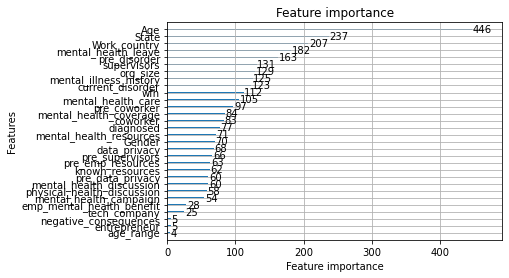

<Figure size 1152x864 with 0 Axes>

In [56]:
# Feature importance plot
ltb.plot_importance(model_lgbm)
plt.figure(figsize = (16, 12))
plt.show()

Text(0.5, 1.0, 'Feature Importance')

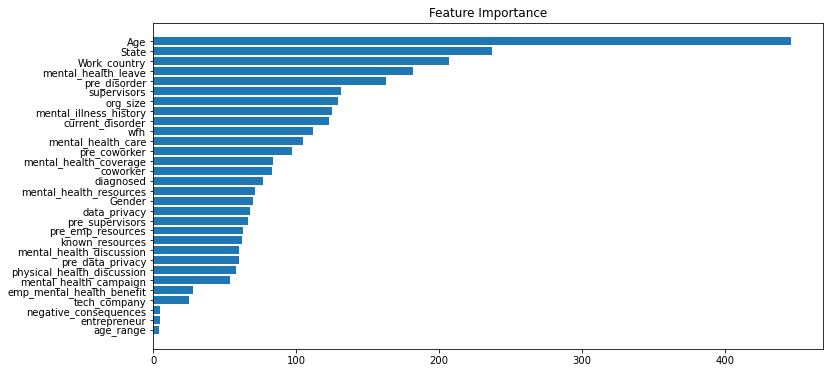

In [70]:
feature_importance = model_lgbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

### XGBoost - default settings

In [44]:
model_xgb = xgb.XGBClassifier()


model_xgb.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_xgb.predict(X_test)

In [49]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       147
           1       0.89      0.87      0.88       212

    accuracy                           0.86       359
   macro avg       0.86      0.86      0.86       359
weighted avg       0.86      0.86      0.86       359

[[125  22]
 [ 27 185]]


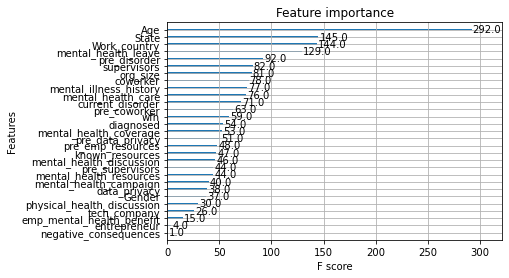

<Figure size 1152x864 with 0 Axes>

In [54]:
# Feature importance plot
xgb.plot_importance(model_xgb)
plt.figure(figsize = (16, 12))
plt.show()

Text(0.5, 1.0, 'Feature Importance')

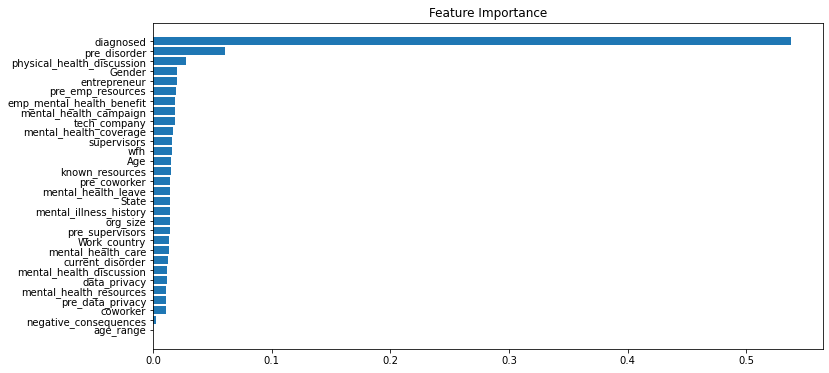

In [68]:
feature_importance = model_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [94]:
# k-fold cross validation XGBoost
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=X,label=y)
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [95]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.821235,0.005228,0.808524,0.035437
1,0.864106,0.028900,0.845128,0.063216
2,0.910760,0.004859,0.902462,0.033871
3,0.917292,0.007791,0.909684,0.027537
4,0.920046,0.006843,0.911277,0.029789
5,0.922069,0.007111,0.913999,0.032201
6,0.923029,0.008133,0.917622,0.031807
7,0.922511,0.009266,0.918044,0.031997
8,0.925840,0.005100,0.921650,0.031044
9,0.927294,0.003877,0.923636,0.030555


### CatBoost - default settings

In [52]:
model_catb = catb.CatBoostClassifier()

model_catb.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_catb.predict(X_test)

Learning rate set to 0.010621
0:	learn: 0.6845377	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.6743311	total: 70.2ms	remaining: 35s
2:	learn: 0.6651606	total: 71.1ms	remaining: 23.6s
3:	learn: 0.6560773	total: 72.7ms	remaining: 18.1s
4:	learn: 0.6468972	total: 73.7ms	remaining: 14.7s
5:	learn: 0.6386893	total: 74.4ms	remaining: 12.3s
6:	learn: 0.6309908	total: 75.2ms	remaining: 10.7s
7:	learn: 0.6234959	total: 76.2ms	remaining: 9.45s
8:	learn: 0.6157090	total: 77.1ms	remaining: 8.49s
9:	learn: 0.6080515	total: 78.1ms	remaining: 7.73s
10:	learn: 0.6005064	total: 79ms	remaining: 7.1s
11:	learn: 0.5942027	total: 79.9ms	remaining: 6.58s
12:	learn: 0.5878827	total: 81.5ms	remaining: 6.19s
13:	learn: 0.5810273	total: 82.5ms	remaining: 5.81s
14:	learn: 0.5732536	total: 83.5ms	remaining: 5.48s
15:	learn: 0.5660749	total: 84.5ms	remaining: 5.19s
16:	learn: 0.5606513	total: 86.2ms	remaining: 4.98s
17:	learn: 0.5545767	total: 87.2ms	remaining: 4.76s
18:	learn: 0.5480876	total: 88.2ms	remaining: 4.5

In [53]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       147
           1       0.92      0.86      0.89       212

    accuracy                           0.87       359
   macro avg       0.87      0.88      0.87       359
weighted avg       0.88      0.87      0.88       359

[[132  15]
 [ 30 182]]


Text(0.5, 1.0, 'Feature Importance')

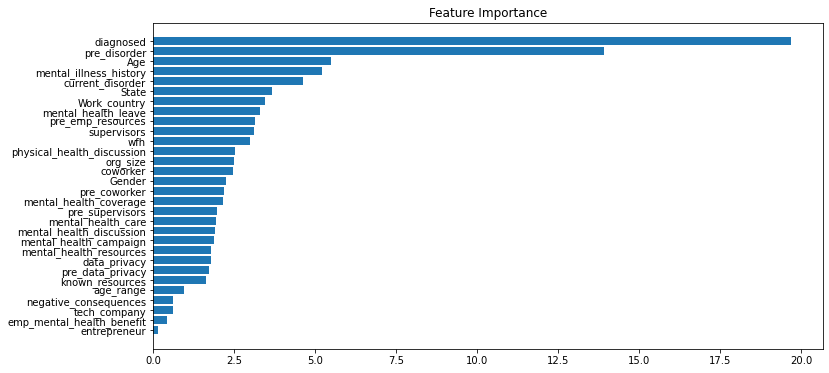

In [67]:
# Feature importance plot
feature_importance = model_catb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

## Parameter tuning

### LightGBM - tuning

In [679]:
model_lgbm_tuned = ltb.LGBMClassifier(
        boosting_type='dart', learning_rate=0.1,
        bagging_freq=1, bagging_fraction=0.855, colsample_bytree=0.9,  
        metric='rmse', num_boost_round=5000, 
        min_child_weight=0.1, num_threads=2, num_leaves=15,
        objective='binary', seed=29, lambda_l1=2, lambda_l2=5, scale_pos_weight=1
)

In [680]:
model_lgbm_tuned.fit(X_train, y_train)
expected_y_lgbm_tuned = y_test
predicted_y_lgbm_tuned = model_lgbm_tuned.predict(X_test)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] num_iterations is set=5000, num_boost_round=5000 will be ignored. Current value: num_iterations=5000
[LightGBM] [Warning] num_threads is set=2, n_jobs=-1 will be ignored. Current value: num_threads=2
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] bagging_fraction is set=0.855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.855
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5


In [681]:
print(metrics.classification_report(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))
print(metrics.confusion_matrix(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       148
           1       0.96      0.92      0.94       211

    accuracy                           0.93       359
   macro avg       0.92      0.93      0.93       359
weighted avg       0.93      0.93      0.93       359

[[139   9]
 [ 17 194]]


### XGBoost - tuning

In [682]:
model_xgb_tuned = xgb.XGBClassifier(
    learning_rate=0.1,  objective= 'binary:logistic', booster='gbtree',
    n_estimators=1000, scale_pos_weight=1, max_depth=4, subsample=0.9, 
    colsample_bytree=0.9, seed=28, reg_alpha=0.01,  num_boost_round=5000)

In [683]:
model_xgb_tuned.fit(X_train, y_train)
expected_y_xgb_tuned  = y_test
predicted_y_xgb_tuned = model_xgb_tuned.predict(X_test)

[07:00:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [684]:
print(metrics.classification_report(expected_y_xgb_tuned, predicted_y_xgb_tuned))
print(metrics.confusion_matrix(expected_y_xgb_tuned, predicted_y_xgb_tuned))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       148
           1       0.96      0.92      0.94       211

    accuracy                           0.93       359
   macro avg       0.93      0.93      0.93       359
weighted avg       0.93      0.93      0.93       359

[[139   9]
 [ 16 195]]


### CatBoost - tuning

In [685]:
model_catb_tuned = catb.CatBoostClassifier(
    depth=6, iterations=1000, learning_rate=0.1, min_data_in_leaf=399
)

In [686]:
model_catb_tuned.fit(X_train, y_train)
expected_y_catb_tuned  = y_test
predicted_y_catb_tuned = model_catb_tuned.predict(X_test)

0:	learn: 0.6173969	total: 5.21ms	remaining: 5.21s
1:	learn: 0.5446620	total: 6.15ms	remaining: 3.07s
2:	learn: 0.4904733	total: 6.82ms	remaining: 2.27s
3:	learn: 0.4498080	total: 7.44ms	remaining: 1.85s
4:	learn: 0.4171303	total: 8.02ms	remaining: 1.59s
5:	learn: 0.3969214	total: 8.62ms	remaining: 1.43s
6:	learn: 0.3755736	total: 9.16ms	remaining: 1.3s
7:	learn: 0.3636586	total: 9.62ms	remaining: 1.19s
8:	learn: 0.3485702	total: 10.2ms	remaining: 1.13s
9:	learn: 0.3373219	total: 10.7ms	remaining: 1.06s
10:	learn: 0.3255455	total: 11.4ms	remaining: 1.02s
11:	learn: 0.3153626	total: 12ms	remaining: 989ms
12:	learn: 0.3104919	total: 13.2ms	remaining: 1000ms
13:	learn: 0.3047700	total: 13.8ms	remaining: 970ms
14:	learn: 0.2971127	total: 14.5ms	remaining: 952ms
15:	learn: 0.2927609	total: 15.3ms	remaining: 940ms
16:	learn: 0.2866075	total: 15.9ms	remaining: 922ms
17:	learn: 0.2813706	total: 16.7ms	remaining: 913ms
18:	learn: 0.2746568	total: 17.5ms	remaining: 906ms
19:	learn: 0.2694590	tot

In [687]:
print(metrics.classification_report(expected_y_catb_tuned, predicted_y_catb_tuned))
print(metrics.confusion_matrix(expected_y_catb_tuned, predicted_y_catb_tuned))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       148
           1       0.97      0.92      0.94       211

    accuracy                           0.94       359
   macro avg       0.93      0.94      0.93       359
weighted avg       0.94      0.94      0.94       359

[[141   7]
 [ 16 195]]


## Sample codes

### Tune & Test Parameters in one run

parameters = {'depth'         : [4,5,6,7,8,9,10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
}

Grid_CBC = GridSearchCV(estimator=model_catb_tuned, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

### Test and Tune each parameter: sample code
#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

param_test4 = {
 'seed':[i for i in range(20,40)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.75, colsample_bytree=0.75,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train, y_train)
#gsearch4.grid_scores_, 
gsearch4.best_params_, gsearch4.best_score_